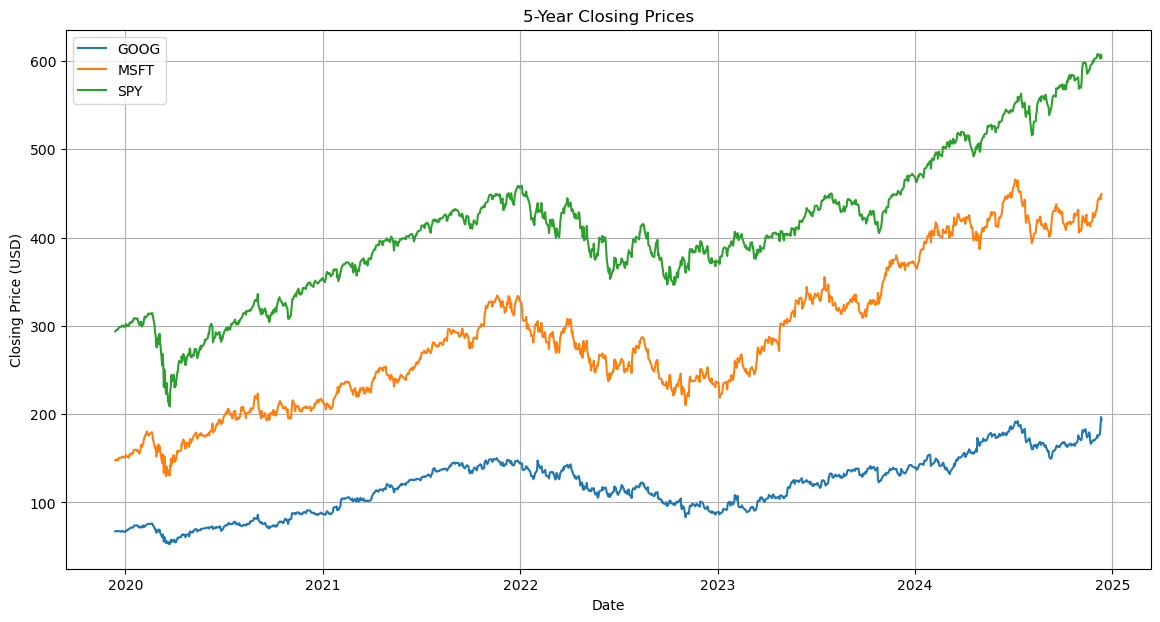

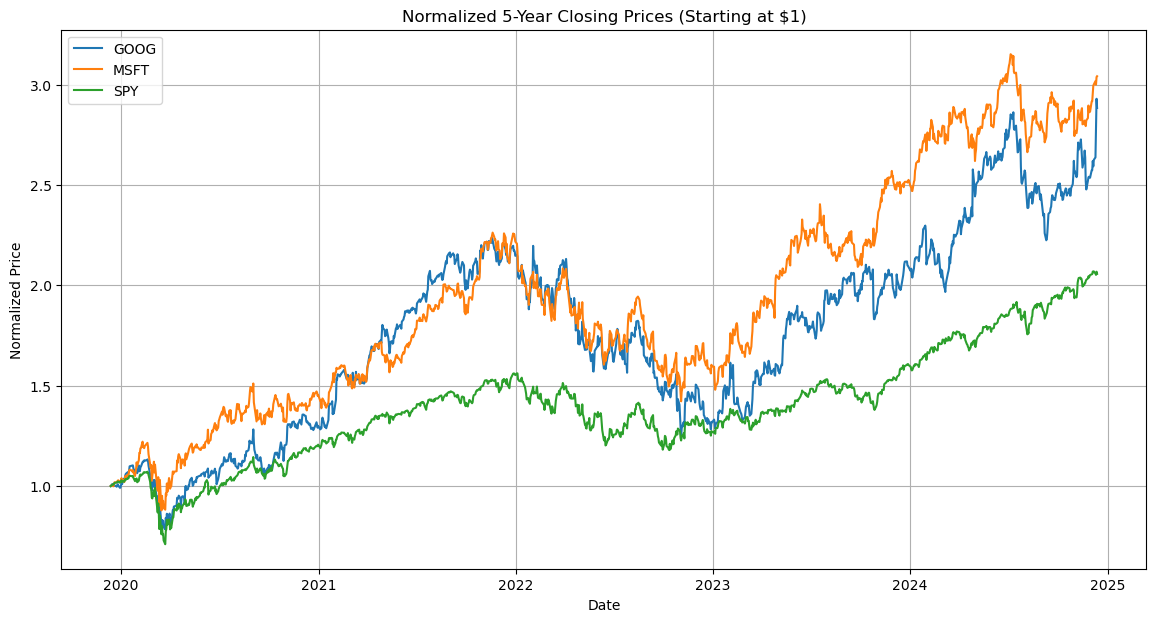


Beta Values:
MSFT: 0.904
GOOG: 1.034

Market Return (annualized): 0.16668330000392376
Market Risk Premium: 0.14668330000392377

Expected Return for MSFT: 0.15260170320354707

Expected Return for GOOG: 0.17167053220405717

Expected Returns (CAPM):
MSFT: 15.260170320354707 %
GOOG: 17.167053220405716 %


In [5]:
## Calculate expected return on MSFT and GOOG using CAPM

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# Define the stock symbols and the period
symbols = ['GOOG', 'MSFT', 'SPY']
period = '5y'

# Create an empty DataFrame to store the closing prices
data = pd.DataFrame()

# Fetch the closing prices for each stock
for symbol in symbols:
    data[symbol] = yf.Ticker(symbol).history(period=period)['Close']

# Plot the original closing prices
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(data.index, data[symbol], label=symbol)

plt.title('5-Year Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Normalize the prices so they all start at $1
normalized_data = data / data.iloc[0] * 1

# Plot the normalized prices
plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(normalized_data.index, normalized_data[symbol], label=symbol)

plt.title('Normalized 5-Year Closing Prices (Starting at $1)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate daily returns for each stock
returns = data.pct_change().dropna()

# Fetch the Beta for MSFT and GOOG and store them in a dictionary
beta_data = {}
for symbol in ['MSFT', 'GOOG']:
    ticker_info = yf.Ticker(symbol).info
    if 'beta' in ticker_info:
        beta_data[symbol] = ticker_info['beta']
    else:
        beta_data[symbol] = None  # Handle missing Beta data

# Print the Beta for MSFT and GOOG
print("\nBeta Values:")
for symbol, beta in beta_data.items():
    print(f"{symbol}: {beta}")

# Calculate the market risk premium
risk_free_rate = 0.02  # assuming a 2% risk-free rate
market_return = returns['SPY'].mean() * 252  # annualized market return (SPY)
market_risk_premium = market_return - risk_free_rate

print(f"\nMarket Return (annualized): {market_return}")
print(f"Market Risk Premium: {market_risk_premium}")

# Calculate the expected returns for GOOG and MSFT using CAPM
expected_returns = {}
for symbol in ['MSFT', 'GOOG']:
    beta = beta_data[symbol]
    expected_return = risk_free_rate + beta * market_risk_premium
    expected_returns[symbol] = expected_return * 100
    print(f"\nExpected Return for {symbol}: {expected_return}")

# Print the expected returns for MSFT and GOOG
print("\nExpected Returns (CAPM):")
for symbol, expected_return in expected_returns.items():
    print(f"{symbol}: {expected_return}","%")
